# <font color='blue'>Plotting in Python</font> 

As a scientist one of the most important tools for conveying information about data is plotting it. In this Jupyter Notebook we will learn the basics of plotting in python using the matplotlib library, as well as numpy, and  scipy.

## The Basics

We will start by running the following import statements below. These allow us to use the tools offfered by each library. 

In [2]:
# The Preamble
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as fitter
%matplotlib inline

### Your First Plot

We are going to run the first few lines to generate some artificial data, then we will run a few commands to generate a plot with it.

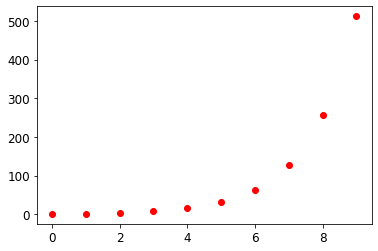

In [257]:
#Create the data set
x = [0,1,2,3,4,5,6,7,8,9]
y = [1,2,4,8,16,32,64,128,256,512]

#Create the plot
plt.figure()
plt.plot(x,y,'ro') #the 'ro' argument makes the color of the data red, and uses dot markers (Not important)
plt.show()

Every plot you make using matplotlib has this general structure in the code. It is always good practice to have your `.figure()` line first, then whatever it is you want to plot in the body, and it should end with a `.show()` line. One could think of this like a plotting sandwich. The `.figure()` command initializes the figure, the `.plot()` command is what actually places the data in the figure, and the `.show()` just presents the finished figure in a pretty fashion. 

Now we can spice up our graph by adding the following lines of code.

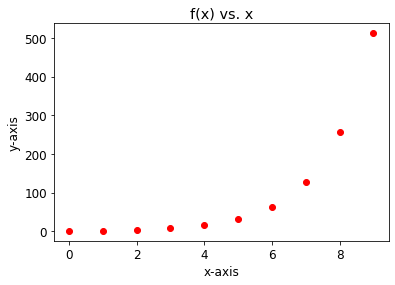

In [258]:
#Create the plot
plt.figure()
plt.title("f(x) vs. x")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.plot(x,y,'ro')
plt.show()

The new commands are pretty straight forward, just note that their argument must be a string or else you will come across an error. Most of the time this is really all you need to present your data, its a graph with axes, a title, and data. We can do so much more though

### Plotting Functions

Lets say you want to plot a sin(x) function to compare your data to, how would you do that? Look at the following.

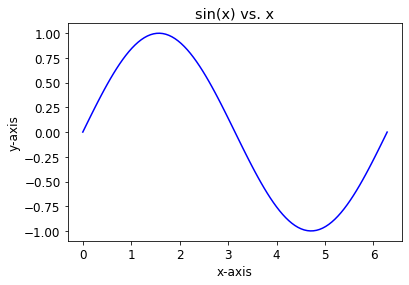

In [259]:
#Create data
x = np.linspace(0, 2*np.pi, 100) # Generates an array of 100 values equally spaced between 0 and 2 pi
y = np.sin(x)                    #in order to make a function look continously smooth, you need a lot of data points

#Create Graph
plt.figure()
plt.title("sin(x) vs. x")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.plot(x,y,'b-') #notice how we change the argument to 'b-', the data will be presented as a blue line
plt.show()

### Plotting Multiple Data Sets on One Graph

Now lets actually put some data on top of the sin graph from before. We'll also plot a cos(x) function just for fun too.

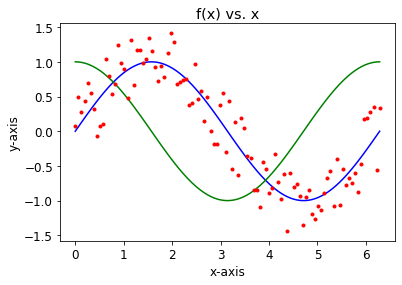

In [260]:
#Create data
x = np.linspace(0, 2*np.pi, 100) # Generates an array of 100 values equally spaced between 0 and 2 pi
y_function_1 = np.sin(x)
y_function_2 = np.cos(x)
y_data = np.sin(x) + np.random.rand(len(x)) - 0.5 #Just making a sin curve with lots of noise

#Create Graph
plt.figure()
plt.title("f(x) vs. x")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.plot(x,y_function_1,'b-')
plt.plot(x,y_function_2,'g-')
plt.plot(x,y_data, 'r.') # notice we used 'r.' which makes smaller dots (good when there's lots of data)
plt.show()

Now, this might get a little chaotic or someone might not know what everything means on the plot. Lets fix that by adding a legend to the plot. We might also want to make the graph a little bigger so it is easier to see. 

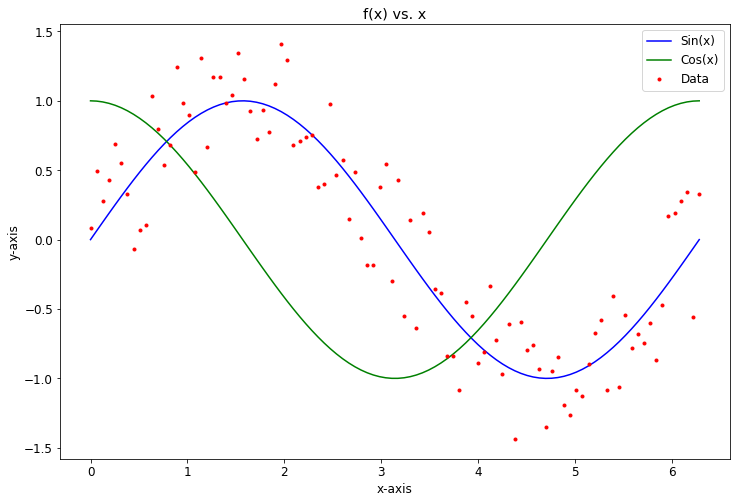

In [261]:
#Create Graph
plt.figure(figsize=(12,8)) #take note of this new argument to figure command, 12 = width, 8 = height
plt.title("f(x) vs. x")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.plot(x,y_function_1,'b-', label='Sin(x)') #We add a new argument called label for each thing we are graphing
plt.plot(x,y_function_2,'g-', label='Cos(x)')
plt.plot(x,y_data, 'r.', label='Data')
plt.legend() # This command actually puts the labels on the plot in a legend
plt.show()

The last thing we need to be able to do is save our graph. Lets see how its done!

We are going to save our image as a .eps file because those format very well in LaTex interpreters but you could easily change the option to .pdf, or .jpg just make sure to change the file name suffix as well. To save the figure uncomment the `.savefig()` command by removing the # just before it. Be careful with this and make sure that after you run the cell you put the # back to comment the line out. This command saves a new image every time it is run. There will be some red error looking boxes, dont worry thats fine. Python just gets annoyed when saving transparent objects (aka the legend in the top right) but it still works.

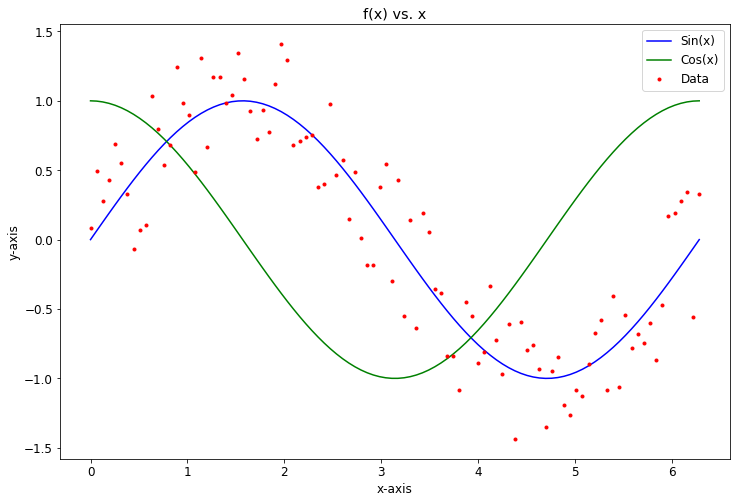

In [262]:
#Create Graph
plt.figure(figsize=(12,8))
plt.title("f(x) vs. x")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.plot(x,y_function_1,'b-', label='Sin(x)')
plt.plot(x,y_function_2,'g-', label='Cos(x)')
plt.plot(x,y_data, 'r.', label='Data')
plt.legend()
#plt.savefig('Example.eps', format='eps', dpi=300, bbox_inches='tight')
plt.show()

## Different Types of Plots, Subplots, and More Options!

Congrats! You got through the basics. That should be enough to be able to graph in just about any class instead of hand drawing your graphs on your problem sets, but we are overacheivers so lets learn a few more things that will be very useful going forward. 

### Errorbars

In real science there is always uncertainties in our data so let's generate some data with some errors in the x and y direction, and plot them. To do this we simply have to define the errors on the x and y data. This can either be a constant value or it can be list like (meaning a different value for every data point, just make sure all the data lists/arrays are the same length or there will be an error)

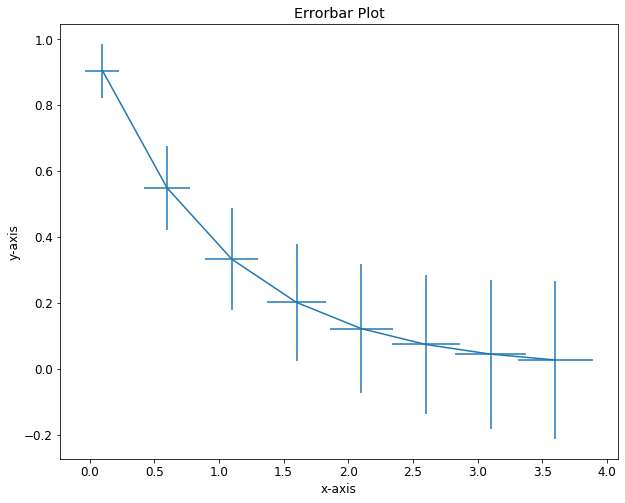

In [263]:
#Generating some arbitrary data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)
yerr = 0.05 + 0.1*np.sqrt(x)
xerr = 0.05 + yerr

#Generating the graph
plt.figure(figsize=(10,8))
plt.title("Errorbar Plot")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.errorbar(x, y, xerr=xerr, yerr=yerr)
plt.show()

We can certainly augment this graph, we don't always want to have a line connecting the data points, so we can remove that line with the fmt argument. We can also overlay the data values as dots so we can see where the center of the spread is. 

If you dont want the error in x or y you can simply remove the xerr or yerr argument all together

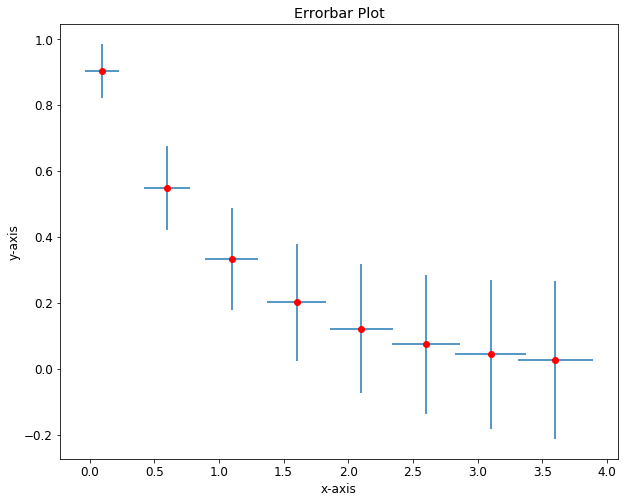

In [264]:
#Generating the graph
plt.figure(figsize=(10,8))
plt.title("Errorbar Plot")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='none') #new argument
plt.plot(x,y,'ro') #plot data points on top of error bars
plt.show()

### Log Plots

We can also change the axes in our graph to create logarithmic plots which are used heavily in astronomy. With Just a few commands we can alter our figure. 

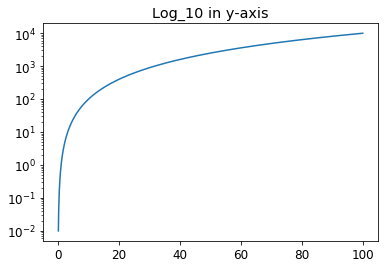

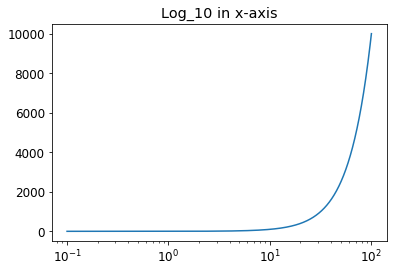

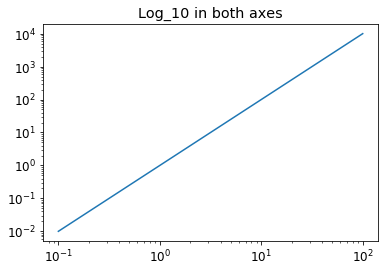

In [265]:
x = np.linspace(1e-1,100,1000)
y = x**2

# logarithmic scale in the y axis
plt.figure()
plt.title("Log_10 in y-axis")
plt.semilogy(x, y)
plt.show()

# logarithmic scale in the x axis
plt.figure()
plt.title("Log_10 in x-axis")
plt.semilogx(x, y)
plt.show()

#logarthmic scale in both x and y

plt.figure()
plt.title("Log_10 in both axes")
plt.loglog(x, y)
plt.show()

### Distributions and Histograms

While this isn't necessarily super important for astro or physics. It is good to know that matplotlib can also plot distributions in the forms of histograms. This is the most basic command for plotting a histogram, if you are really interested in a few more things matplotlib has to offer on this, jump to the bottom of the notebook or simply go on stackoverflow and you can find tons of info about this. 

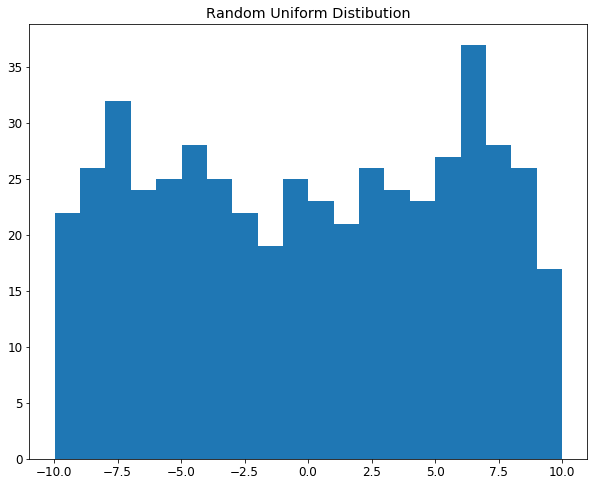

In [266]:
x = np.random.uniform(low=-10,high=10,size=500)
plt.figure(figsize=(10,8))
plt.title("Random Uniform Distibution")
n,bins,patches = plt.hist(x,20)
plt.show()

### Subplots

Great! Now that we can graph a regular figure really well, lets graph multiple plots in one figure. When presenting data it can be nice to have all of your similar graphs located in one figure to save space. 

Before getting into this, it is good to have a little background as to how matplotlib can generate a figure. All the examples before were using the State-Machine Approach to graphing in matplotlib. This is a different approach than what is known as the Object Oriented Approach. The way they are different is that with the object oriented method we are actually creating an object for each subplot in python which we can call functions on and  As a rule of thumb, we typically use the state-machine approach when you only want to plot one graph in a figure and its fairly simple. We use object oriented when dealing with subplots and more complicated graphing techniques. We use the object method for subplots simply because we can keep track of multiple graph objects within a figure much easier than the other method allows us to. When you go online to get help graphing, you will typically see a mix of these methods. Just know they are both fine ways of graphing in python and there is very little that changes between the two.

Lets start with just making a graph using the object oriented method. 

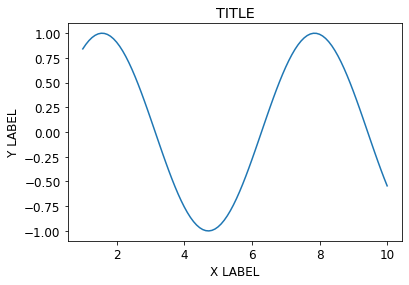

In [267]:
x = np.linspace(1,10,100)
y = np.sin(x)

# Object oriented singular graph
fig, ax = plt.subplots(1,1) #create the ax object within the fig figure
ax.plot(x, y) #call plot function from ax
ax.set_title('TITLE') #notice the change in notation here for the new approach => .set_title NOT .title
ax.set_xlabel('X LABEL')
ax.set_ylabel('Y LABEL')
plt.show()

Now lets get ambitious and add some subplots using this method

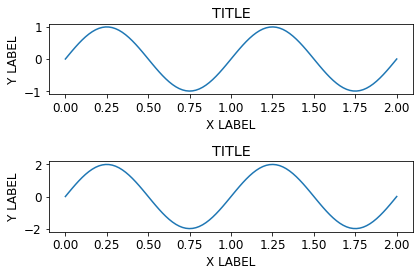

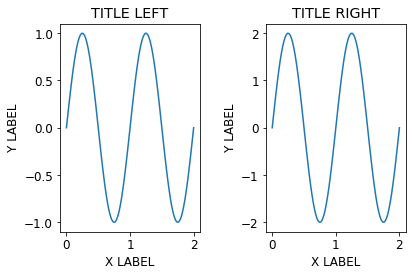

In [268]:
x = np.linspace(0, 2, 100)
y1 = np.sin(2*np.pi*x)
y2 = np.sin(4*np.pi*x)

#create a figure with 2 graphs oriented one way
fig, (ax1, ax2) = plt.subplots(2,1)  # 2 Rows, 1 Column
#top graph
ax1.plot(x, y1)
ax1.set_title('TITLE')
ax1.set_xlabel('X LABEL')
ax1.set_ylabel('Y LABEL')
#bottom graph
ax2.plot(x, 2*y1)
ax2.set_title('TITLE')
ax2.set_xlabel('X LABEL')
ax2.set_ylabel('Y LABEL')
fig.tight_layout() #this makes the 
plt.show()

#---------------------------------------------------------------------------------------------------------------------

#create a figure with 2 graphs oriented another way
fig, (ax1, ax2) = plt.subplots(1,2,)  # 1 Row, 2 Columns
#left graph
ax1.plot(x, y1)
ax1.set_title('TITLE LEFT')
ax1.set_xlabel('X LABEL')
ax1.set_ylabel('Y LABEL')
#right graph
ax2.plot(x, 2*y1)
ax2.set_title('TITLE RIGHT')
ax2.set_xlabel('X LABEL')
ax2.set_ylabel('Y LABEL')
fig.tight_layout()
plt.show()

Lets go crazy and combine everything we've learned so far to create a huge figure with lots of plots! We are also going to use another way to graph lots of data points using `.scatter()` instead of `.plot(_,_,'ro')`. They are both the same thing, but it is good to know that both things exist and mean the same thing. 

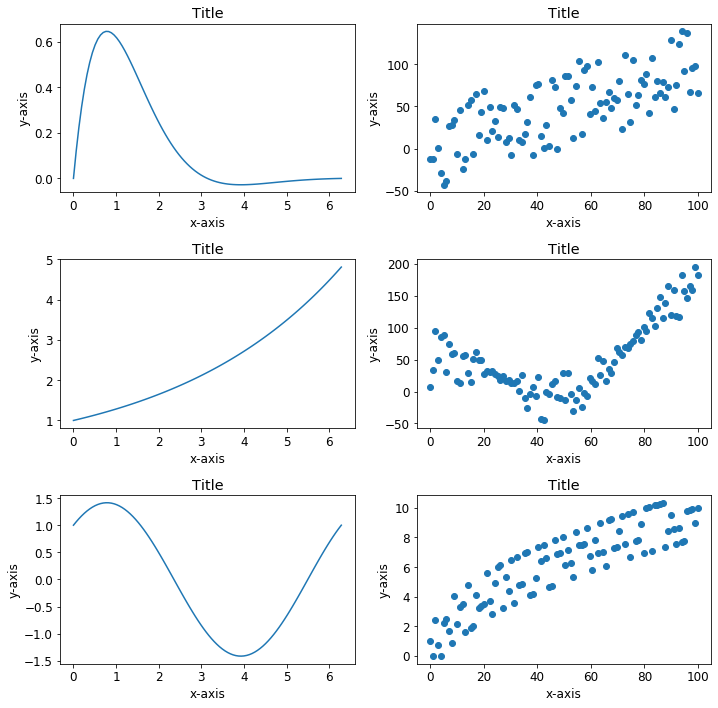

In [269]:
#Generating some random data stuff, not important
x = np.linspace(0,2*np.pi, 100)
x_1 = np.linspace(0,100,100)
y1 = 2*np.sin(x)*np.exp(-x)
y2 = np.exp(x/4)
y3 = np.cos(x) + np.sin(x)
x_scatter = np.linspace(0,100,100)
y1_scatter = (x_scatter) + np.random.randint(low=-50, high=50, size=100)
y2_scatter = x_scatter + np.cos(x)*np.random.random(100)*100
y3_scatter = np.sqrt(x_scatter) + np.random.randint(low=-2, high=2, size=100)



#Generating the very large figure
#one figure with 2 columns, and 3 rows
f, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2, figsize=(10,10))
#top left
ax1.plot(x,y1)
ax1.set_title("Title")
ax1.set_xlabel("x-axis")
ax1.set_ylabel("y-axis")
#top right
ax2.scatter(x_scatter, y1_scatter)
ax2.set_title("Title")
ax2.set_xlabel("x-axis")
ax2.set_ylabel("y-axis")
#middle left
ax3.plot(x,y2)
ax3.set_title("Title")
ax3.set_xlabel("x-axis")
ax3.set_ylabel("y-axis")
#middle right
ax4.scatter(x_scatter, y2_scatter)
ax4.set_title("Title")
ax4.set_xlabel("x-axis")
ax4.set_ylabel("y-axis")
#bottom left
ax5.plot(x,y3)
ax5.set_title("Title")
ax5.set_xlabel("x-axis")
ax5.set_ylabel("y-axis")
#bottom right
ax6.scatter(x_scatter, y3_scatter)
ax6.set_title("Title")
ax6.set_xlabel("x-axis")
ax6.set_ylabel("y-axis")
f.tight_layout()
plt.show()

### Example
Here is an example of why we might want all these skills. Lets say we wanted to look at a stars spectra and learn some information about it. Lets start with the black body function: $$B_{\nu}(T) = \frac{2h \nu^3/c^2}{\exp({h \nu/kT}) - 1}$$

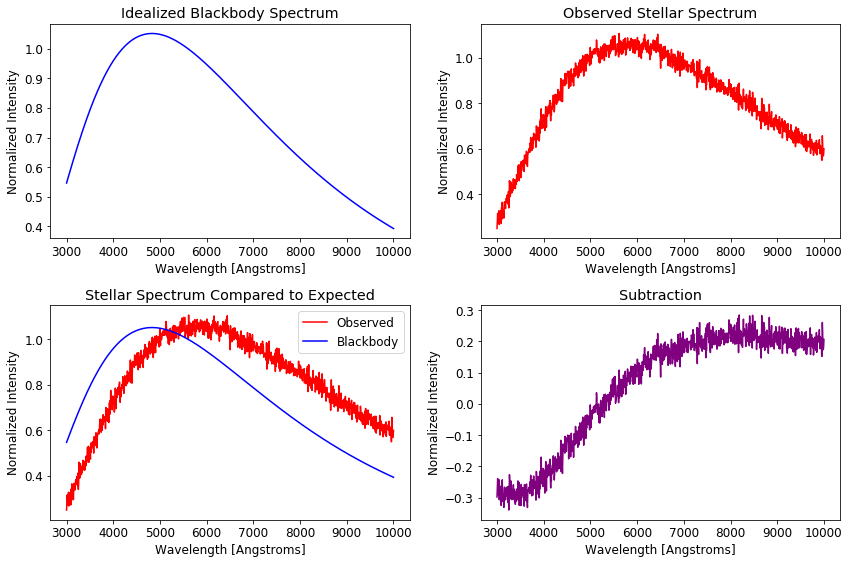

In [270]:
from astropy.modeling.blackbody import blackbody_lambda #just importing a blackbody function from astropy library

wavelengths = np.linspace(3000,10000,1000) # must be passed to the function below in units of angstroms
bb_intensity = blackbody_lambda(wavelengths,temperature = 6000)/blackbody_lambda(5600,temperature=6000)
bb_intensity_1 = blackbody_lambda(wavelengths,temperature = 5000)/blackbody_lambda(5000,temperature=5000)
# returns in units of ergs/s/cm^2/Angstrom/steradian but we are normalizing it so we dont have to worry about units
noise = np.random.normal(0,0.025,1000)
star_spectra = bb_intensity_1 + noise



fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(12,8))  # 2 Rows, 2 Columns
#top left graph
ax1.plot(wavelengths, bb_intensity,'b-')
ax1.set_title('Idealized Blackbody Spectrum')
ax1.set_xlabel('Wavelength [Angstroms]')
ax1.set_ylabel('Normalized Intensity')
#top right graph
ax2.plot(wavelengths, star_spectra,'r-')
ax2.set_title('Observed Stellar Spectrum')
ax2.set_xlabel('Wavelength [Angstroms]')
ax2.set_ylabel('Normalized Intensity')
#bottom left graph
ax3.plot(wavelengths, star_spectra,'r-', label='Observed')
ax3.plot(wavelengths, bb_intensity,'b-', label='Blackbody')
ax3.set_title('Stellar Spectrum Compared to Expected')
ax3.set_xlabel('Wavelength [Angstroms]')
ax3.set_ylabel('Normalized Intensity')
ax3.legend()
#bottom right graph
ax4.plot(wavelengths, star_spectra - bb_intensity, color='purple') #when we use 'r-' that is short for color = 'red'
ax4.set_title('Subtraction')                                       #and marker = '-', the shortcuts dont have every option
ax4.set_xlabel('Wavelength [Angstroms]')
ax4.set_ylabel('Normalized Intensity')
fig.tight_layout()
plt.show()

With a little bit of knowledge of astronomy we can infer from our graphs that since the spectrum for the observed star peaks nearly 1000 Angstroms greater in wavelength than the idealized blackbody, this particular star is redshifted by the doppler shift equation: $$z = \frac{\lambda_{obs} - \lambda_{emit}}{\lambda_{emit}}$$ which from reading the bottom left graph we can say that $\Delta \lambda \approx 1000$ Angstroms and thus $z \approx \frac{v}{c} \approx \frac{1}{5}$ so this star happens to be moving away from us at nearly 20% the speed of light! Or this particular star light could have been blocked by interstellar dust which would also cause a redshift and altered spectrum. 

## Beautifying Your Plots

Everything we just covered was how to plot, but we can make them look really pretty, with lots of decorative feautures. Here I am just going to cover some extra lines you can add to your plots to make them standout from the rest. 

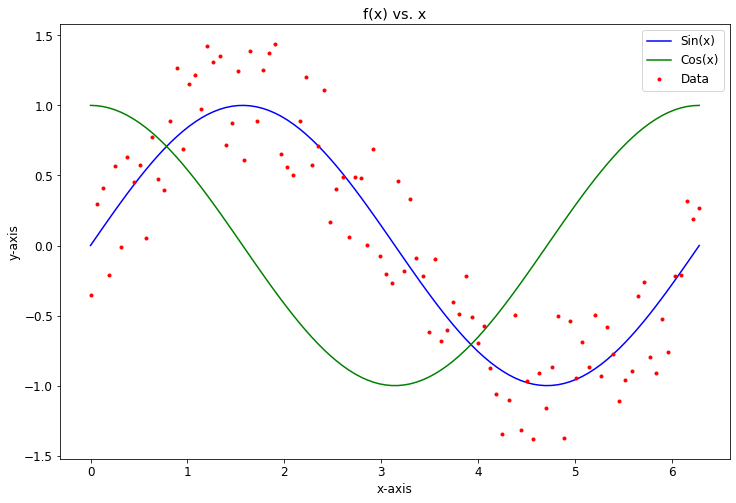

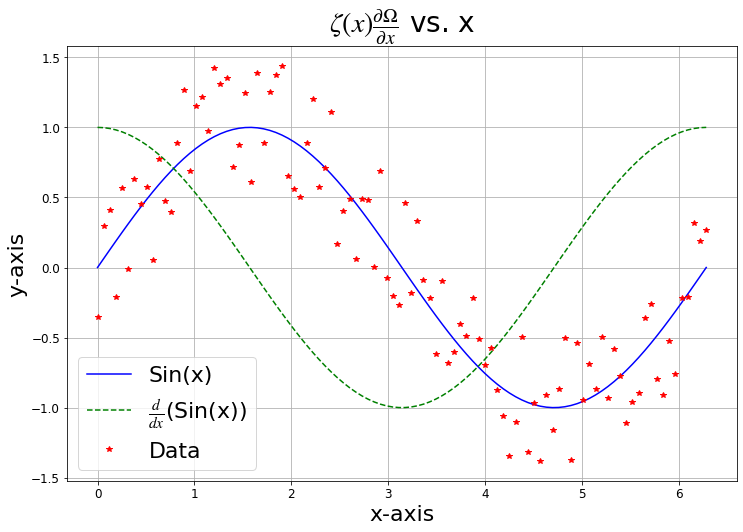

In [298]:
#Create data
x = np.linspace(0, 2*np.pi, 100) # Generates an array of 100 values equally spaced between 0 and 2 pi
y_function_1 = np.sin(x)
y_function_2 = np.cos(x)
y_data = np.sin(x) + np.random.rand(len(x)) - 0.5 #Just making a sin curve with lots of noise

#Create Boring Graph
plt.figure(figsize=(12,8)) #take note of this new argument to figure command
plt.title("f(x) vs. x")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.plot(x,y_function_1,'b-', label='Sin(x)') #We add a new argument called label for each thing we are graphing
plt.plot(x,y_function_2,'g-', label='Cos(x)')
plt.plot(x,y_data, 'r.', label='Data')
plt.legend() # This command actually puts the labels on the plot in a legend
plt.show()


#Creating a beautified plot

"""This is absolutely not necessary, this simply just changes the fonts on the graph to be more aesthetically pleasing
changes from generic font to a times new roman type font, note once you run it once it changes the whole notebook font style

plt.rcParams['mathtext.fontset'],plt.rcParams['font.family'] = 'stix', 'STIXGeneral'
plt.rcParams.update({'font.size': 14})

if you choose to switch back to the old font, run this

plt.rc('font', family='sans-serif') 
plt.rc('font', serif='Helvetica Neue') 
plt.rc('text', usetex='false') 
plt.rcParams.update({'font.size': 12})"""

plt.figure(figsize=(12,8)) #take note of this new argument to figure command
plt.title("$\zeta(x)\\frac{\partial \Omega}{\partial x}$ vs. x", fontsize=28) # adding fontsize
plt.xlabel("x-axis", fontsize=22)
plt.ylabel("y-axis", fontsize=22)
plt.plot(x,y_function_1,'b-', label='Sin(x)') #We add a new argument called label for each thing we are graphing
plt.plot(x,y_function_2,'g--', label='$\\frac{d}{dx}$(Sin(x))') # double $ creates a LaTex environment string
plt.plot(x,y_data, 'r*', label='Data') # * is the star marker
plt.grid() #add grid lines
plt.legend(fontsize=22) # This command actually puts the labels on the plot in a legend
plt.show()

As you can see, we can do quite a few things to a graph to make it a lot more interesting. Here we added gridlines, changed the markers up a bit to include stars, dashed lines, and solid lines. We also changed the font type for the graphs so its not your same old generic font, enlarged the legend, and used LaTex within our labels/titles. All of this is simply to make it look prettier, certainly not necessary. 

I encourage you to explore all the different options matplotlib has to offer, check out the types of markers, the different fonts, you can even change the background color of the plot! You can gain new levels of fine tuning for your graph's colors, and marker styles by using arguments like `marker` and `color`.

## Other Types of Plots

This is just to show you some of the other types of graphs matplotlib can make even if you will likely never use them

For example, here is `meshgrid` and `imshow` which allows for three dimensional plots! These are just meant to be examples of what you can do, and if you ever need to graph something like one of these you can just come here to look at how the documentation works, then use google to figure out how to add what you're missing.

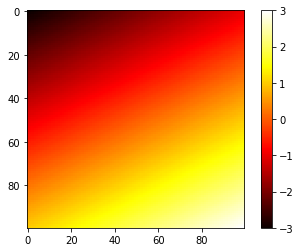

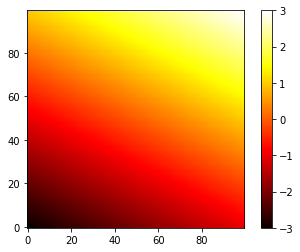

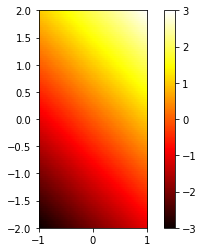

In [4]:
# Generate the x and y values for a 2D grid
x, y = np.meshgrid(np.linspace(-1, 1, 100),
                   np.linspace(-2, 2, 100))

# Calculate the values that we want to plot at each point.
# This is a 2D array.
f = x + y

plt.figure()
plt.imshow(f)          # Plot the 2D array
plt.set_cmap('hot')   # Set the color scheme ("jet" is matplotlib's default)
plt.colorbar()         # Display a legend for the color values
plt.show()

# Move the origin to the lower-left
plt.figure()
plt.imshow(f, origin="lower")
plt.colorbar()
plt.show()

# Customize the axes limit labels.
# imshow automatically adjusts the aspect ratio!
plt.figure()
plt.imshow(f, origin="lower", extent=[-1, 1, -2, 2])
plt.colorbar()
plt.show()

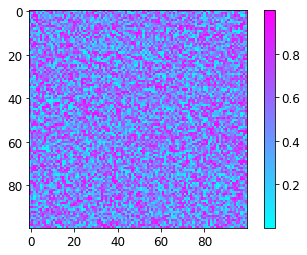

In [297]:
#imshow can plot any 2D array ... you saw this earlier with meshgrid

array_2D = np.random.rand(100,100)
plt.imshow(array_2D)  # show the new 2D array
plt.set_cmap('cool') # set colormap
plt.colorbar()
plt.show()

#### We can also plot images!

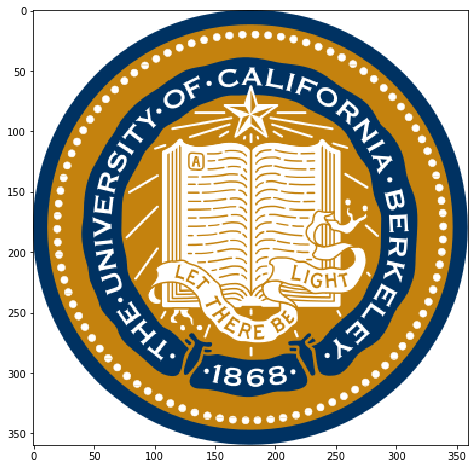

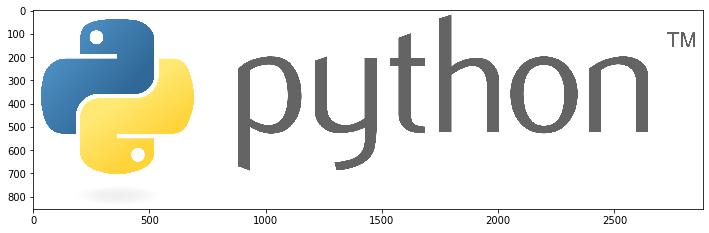

In [10]:
# Displaying images -- http://matplotlib.org/users/image_tutorial.html
import matplotlib.image as mpimg
img=mpimg.imread('http://upload.wikimedia.org/wikipedia/commons/thumb/a/a1/Seal_of_University_of_California%2C_Berkeley.svg/360px-Seal_of_University_of_California%2C_Berkeley.svg.png')
img2=mpimg.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/2880px-Python_logo_and_wordmark.svg.png')
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.show()


plt.figure(figsize=(12,8))
plt.imshow(img2)
plt.show()

### We can also make some pretty fancy scatter plots 

If you wanted to use something like this in an HR Diagram that would look very aesthetically pleasing!

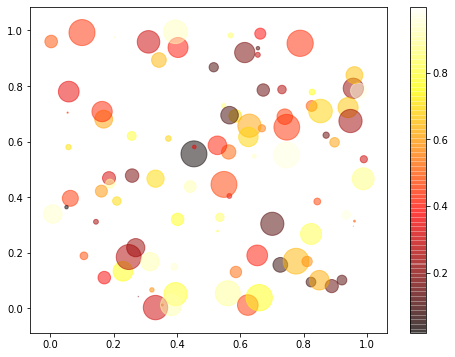

In [12]:
# Scatter plot -- http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html
N = 100
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radiuses

plt.figure(figsize=(8,6))
plt.scatter(x, y, s=area, c=colors, alpha=0.5) #alpha is the transparency 
plt.hot()        # set colormap
plt.colorbar()   # add a colorbar
plt.show()

### We can plot polar graphs!

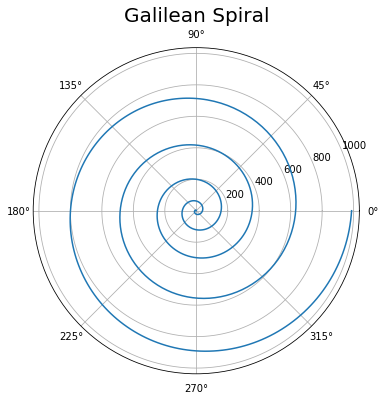

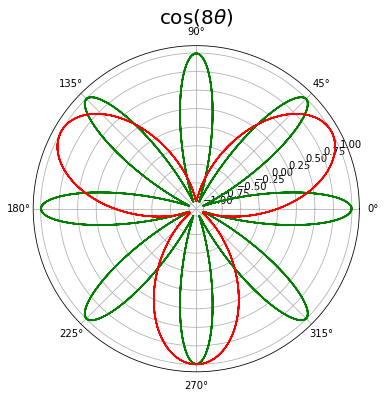

In [15]:
# Polar Plot (with polar axes) -- http://matplotlib.org/examples/pylab_examples/polar_demo.html
#   Note: there's a bug with polar axes in matplotlib, where they
#   cannot display negative r values.

theta = np.linspace(0, 10 * np.pi, 1000)
r = [th**2 for th in theta]
r2 = np.cos(8*theta)


plt.figure(figsize=(6,6))
ax = plt.subplot(111, projection='polar')
ax.plot(theta, r)
ax.set_title("Galilean Spiral", va='bottom', fontsize='20')
plt.show()

print('\n')

plt.figure(figsize=(6,6))
plt.polar(theta, r2,'g-')
plt.title("cos($8 \\theta$)", fontsize='20')
plt.polar(theta, np.sin(3*theta),'r-')
plt.show()

### Here is how to make a contour plot

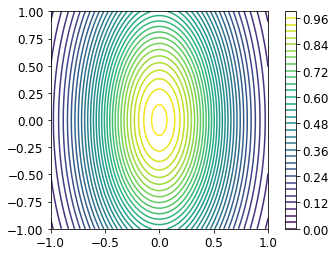

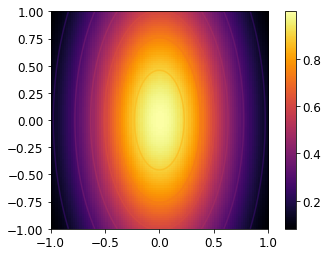

In [287]:
# Contour Plot -- http://matplotlib.org/examples/pylab_examples/contour_demo.html
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x,y)
Z = np.exp(-(2*X**2 + Y**2/2))

ax = plt.subplot(111)
levels = np.arange(0,1.0,.03)
con = ax.contour(X, Y, Z, levels)
ax.set_aspect('equal')
plt.colorbar(con)
plt.show()


# You can plot contour and imshow together ...
plt.figure()
plt.inferno() # set the colormap
plt.contour(X, Y, Z)
plt.imshow(Z, extent=[-1,1,-1,1])
plt.colorbar()
plt.show()

matplotlib has many colormaps to choose from. See [this page](http://matplotlib.org/examples/color/colormaps_reference.html) for a list of all the possible colormaps. You can use any of them by inserting a `set_cmap` command after your `imshow`, `scatter`, or any plotting function that can use a colormap. For instance, `plt.set_cmap('jet')`. some colormaps, such as `jet`, `hot`, `gray`, and `viridis`, have special commands to use them: you can type `plt.gray()` instead of `plt.set_cmap('gray')`.

### Plot Annotation 

It can be extremely useful to be able to add arrows and other annotations to your plot, a basic
example is shown below. 

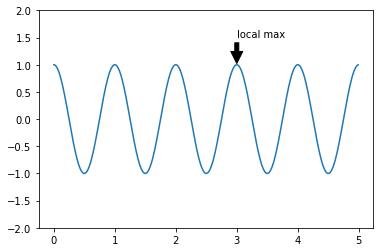

In [19]:
ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)


plt.plot(t, s)
plt.annotate('local max', xy=(3, 1), xytext=(3, 1.5),arrowprops=dict(facecolor='black', shrink=0.05))
plt.ylim(-2, 2)
plt.show()

# Congrats!!!

You are now a veteraned plotter in python. If you were able to understand this, then that means you should be ready for just about any plotting you could possibly need in python. Please feel free to use this as a reference notebook for the future. Some of the material within this notebook was compiled from Physics 77/88, Intro to Astro Research Summer Workshop, and Aliza Beverages Python Crash Course to Plotting. 

In a future notebook, we will cover how to import data files and plot them using all the techniques and methods described here, we will also cover curve fitting a data set. As a challenge, try to make your own plots of whatever you want. Try graphing some obsurd functions, create a data set and make a histogram, graph some multivariable functions from Math 53, the sky is the limit.

Written by James Sunseri